# Dataset and motivation section

In our everyday lives, happiness is a important measurement of how good a person lives on this world. The dataset being used in this analysis report is Happiness Dataset. The dataset is "The World Happiness Report is a landmark survey of the state of global happiness". In this dataset there is the happiness scores, rankings  and the scores of other factors who affect happiness score from 2015 to 2017. 

## Dataset variables(Only Display those we decided to keep):
The Explainatory Variables are:

    Country	
    Dystopia Residual	
    Economy (GDP per Capita)	
    Family	
    Freedom	
    Generosity		
    Health (Life Expectancy)	
    Region	(as FACTOR)
    Trust (Government Corruption)
     
The Response Variable is:

    Hppiness Score (We will convert this variable into binary to perform Logistic Regression)

## Project Motivation:
All the factors can use to predict the happiness score in the future. However, we want to make it simple. We considered people in different region have happiness score greater than the average happines score "happy". Otherwise, we considered as sad. Then, we want to find a logistic regression model of happiness related to region of the world. This will provide a prediction of whether people are happy or not in the future. 

Although this is similar to predict the happiness score, this model could directly show whether people are happy or not rather than provide a score. We will also provide the probability of the test data result. Out motivation for this is that when we look at the data, the score does not directly shows whether people are happy or not. We have to convert the score into specific level. So we make it simply as 1 for happy and 0 for not happy. We also want to see the prediction result of happiness in the future.

The dataset used for this project is from https://www.kaggle.com/unsdsn/world-happiness/downloads/world-happiness-report.zip/2#2016.csv.

Here are the raw data:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
happy_2015 = pd.read_csv("2015.csv")
happy_2016 = pd.read_csv("2016.csv")
happy_2017 = pd.read_csv("2017.csv")
happy_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happy_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


As we can see, the three csv files all have the different columns, and some of the columns we do not want to use. Thus we consider to clean up the data in order to do the modeling.

# Cleaning the dataset

We first consider to drop some of the columns which will not be used for. We need to analyze the main factors of making people happy so we eliminate the Happiness Rank, Standard Error, Lower Confidence Interval, Upper Confidence Interval, Whisker.high, and Whisker.low columns. If we keep these columns, these columns will cause a lot of distraction to our logistic regression model.

In [7]:
happy_2015=happy_2015.drop(columns=['Happiness Rank','Standard Error'])
happy_2016=happy_2016.drop(columns=['Happiness Rank','Lower Confidence Interval','Upper Confidence Interval'])
happy_2017=happy_2017.drop(columns=['Whisker.high','Happiness.Rank','Whisker.low'])

Here are the shapes of each cleaned dataframe are displayed. We wish to use these to check if we concatenate the dataframes successful.

In [8]:
happy_2015.head()
happy_2015.shape

(158, 10)

In [9]:
happy_2016.head()
happy_2016.shape

(157, 10)

In [10]:
happy_2017.head()
happy_2017.shape

(155, 9)

We rename the columns in happy_2017 in order to make the variable names in this dataframe the same with other two dataframes, so that we can concatenate these dataframes into one final dataframe.

In [11]:
happy_2017=happy_2017.rename(index=str, columns={"Happiness.Score": "Happiness Score", "Economy..GDP.per.Capita.": "Economy (GDP per Capita)","Health..Life.Expectancy.":"Health (Life Expectancy)","Trust..Government.Corruption.":"Trust (Government Corruption)","Dystopia.Residual":"Dystopia Residual"})

In [12]:
happy_2017.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


We concatenate all dataframes together into one final dataframe named 'happy', can see there are 470 columns in total, which is the sum of rows from above three dataframes, so that we know the concatenation succeeded.

In [14]:
happy = pd.concat([happy_2015,happy_2016,happy_2017],sort=True)
happy.shape

(470, 10)

For the dataframe happy_2017, it does not have the Region column. So when we concatenate all of the, the Region column for those rows from csv_2017 shows NaN. Therefore we fill the missing Region values by using the same Regions for country from the dataframe happy_2015 and happy_2016. 

This is how we deal with missing data.

In [15]:
g = happy.dropna(subset=['Region']).drop_duplicates('Country').set_index('Country')['Region']
happy['Region'] = happy['Region'].fillna(happy['Country'].map(g))

But after checking NANs, there are still two rows have no 'Region' value. We display them and find they are Taiwan and Hongkong, so we add them with 'Eastern Asia' Region manually.

In [16]:
happy1 = happy[happy.isna().any(axis=1)]
happy1

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption)
32,Taiwan Province of China,2.126607,1.433627,1.384565,0.361467,0.258360,6.422,0.793984,NaN,0.063829
70,"Hong Kong S.A.R., China",0.554633,1.551675,1.262791,0.490969,0.374466,5.472,0.943062,NaN,0.293934


In [56]:
happy = happy.fillna("Eastern Asia")
happy.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption)
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,7.587,0.94143,Western Europe,0.41978
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,7.561,0.94784,Western Europe,0.14145
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,7.527,0.87464,Western Europe,0.48357
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,7.522,0.88521,Western Europe,0.36503
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,7.427,0.90563,North America,0.32957


We add a new column called "happy sad". This column is a binary column. The value based on the "Happiness Score" column. Firstly, we find the mean score of "Happiness Score". Then, based on the mean score we put 1 or 0 in "happy sad" column. If the score is less than mean score we put 0 in it which means unhappy, else we put 1 in it for happy. 
This is the variable we use as Response Variable to do the logistic regression.

In [17]:
m = happy["Happiness Score"].mean()

In [18]:
def add_happy(row):
    if row["Happiness Score"] <= m:
        return 0
    else:
        return 1
happy["happy sad"] = happy.apply (lambda row: add_happy(row), axis=1)
happy.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),happy sad
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,7.587,0.94143,Western Europe,0.41978,1
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,7.561,0.94784,Western Europe,0.14145,1
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,7.527,0.87464,Western Europe,0.48357,1
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,7.522,0.88521,Western Europe,0.36503,1
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,7.427,0.90563,North America,0.32957,1


Here are the statistical summary of our cleaned dataset

In [19]:
happy.describe(include = 'all')

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),happy sad
count,470,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,468,470.000000,470.000000
unique,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN
top,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117,NaN,NaN
mean,NaN,2.092717,0.927830,0.990347,0.402828,0.242241,5.370728,0.579968,NaN,0.134790,0.478723
std,NaN,0.565772,0.415584,0.318707,0.150356,0.131543,1.136998,0.240161,NaN,0.111313,0.500079
min,NaN,0.328580,0.000000,0.000000,0.000000,0.000000,2.693000,0.000000,NaN,0.000000,0.000000
25%,NaN,1.737975,0.605292,0.793000,0.297615,0.152831,4.509000,0.402301,NaN,0.059777,0.000000
50%,NaN,2.094640,0.995439,1.025665,0.418347,0.223140,5.282500,0.630053,NaN,0.099502,0.000000
75%,NaN,2.455575,1.252443,1.228745,0.516850,0.315824,6.233750,0.768298,NaN,0.173161,1.000000


From the summary, we can see that all of our data are numerical, so we could find the mean, standard deviation, min value, 25 percent quantile, 50 percent quantile, 75 percent quantile, and max value. We could see the mean score of "Happiness Score". We use it as a guide to create the "happy sad" column. There are duplicate value for "Region" because we are using 3 years of data for all countries. Thus we consider to keep to duplicate in order to create the model.

# Visualization

Here are the Histogram for each variables.  We can find that all other variables other than 'happy sad'( which is the binary variable) follow Normal Distribution. so we conclude that the data is good for doing the logistic regression.

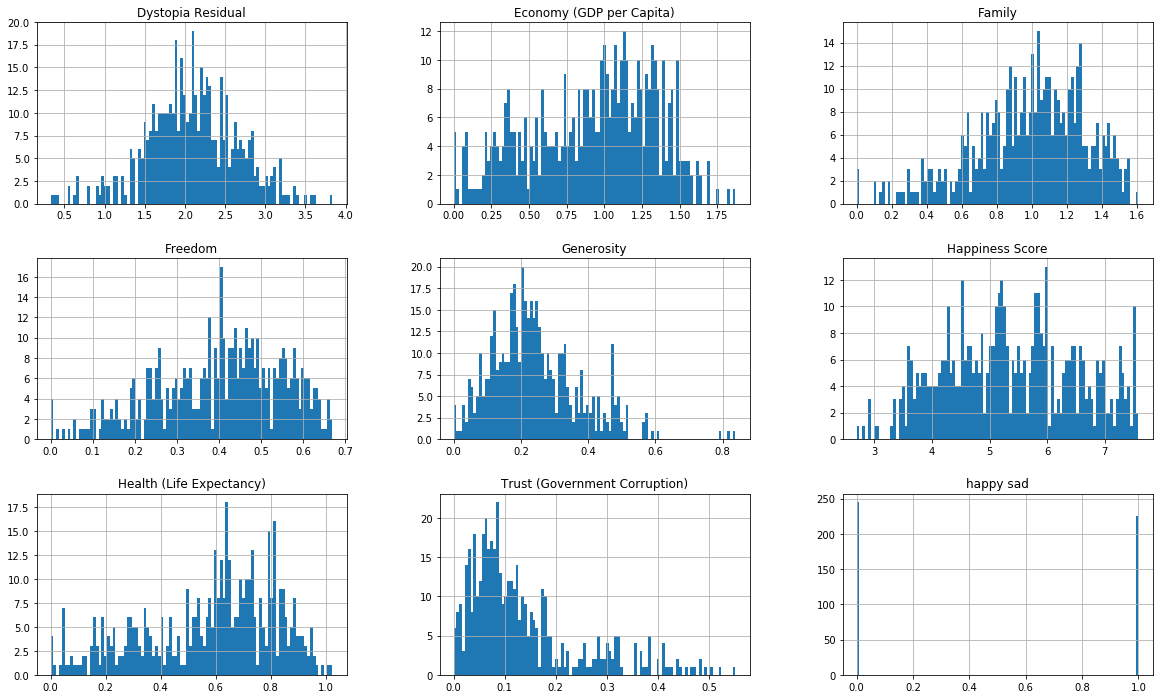

In [20]:
happy.hist(bins=100, figsize=(20, 12))
plt.show()

From this graph we can see that people from 'Middle East and Northern Africa' have the most  diverse happiness situation. These data are good for our model.

Also, People from 'North America' and 'Australia and New Zealand' are least diverse, all of them are above 7, which means very happy. However, since north America and Australia and New Zealand does not have many countries, so the data does not have a high effect on or model. 

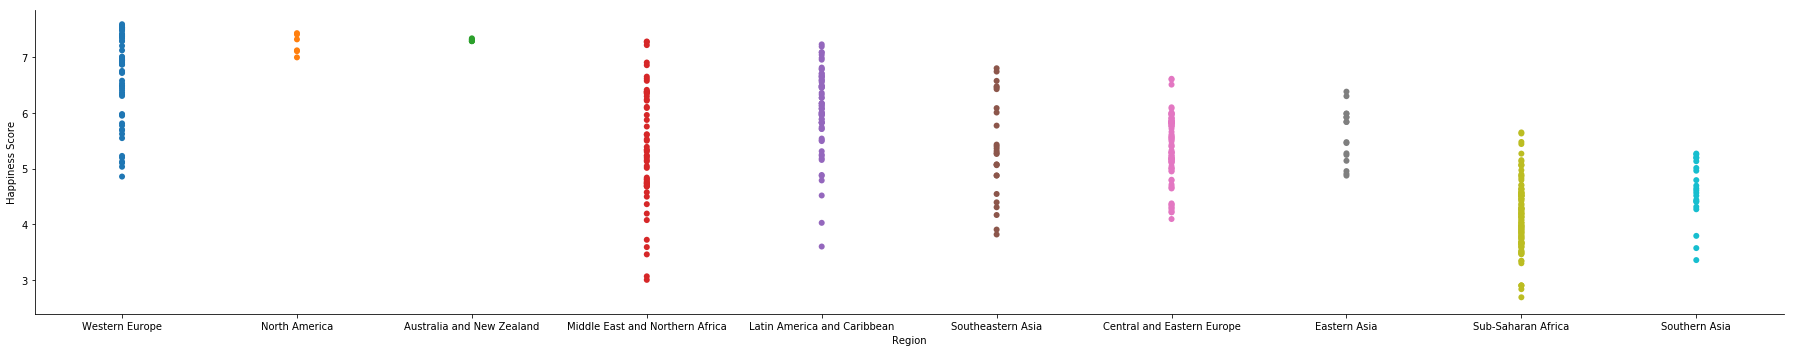

In [22]:
g1 = sns.catplot(x='Region', y="Happiness Score", jitter=False, data=happy, s=6)
g1.fig.set_size_inches(30,5)

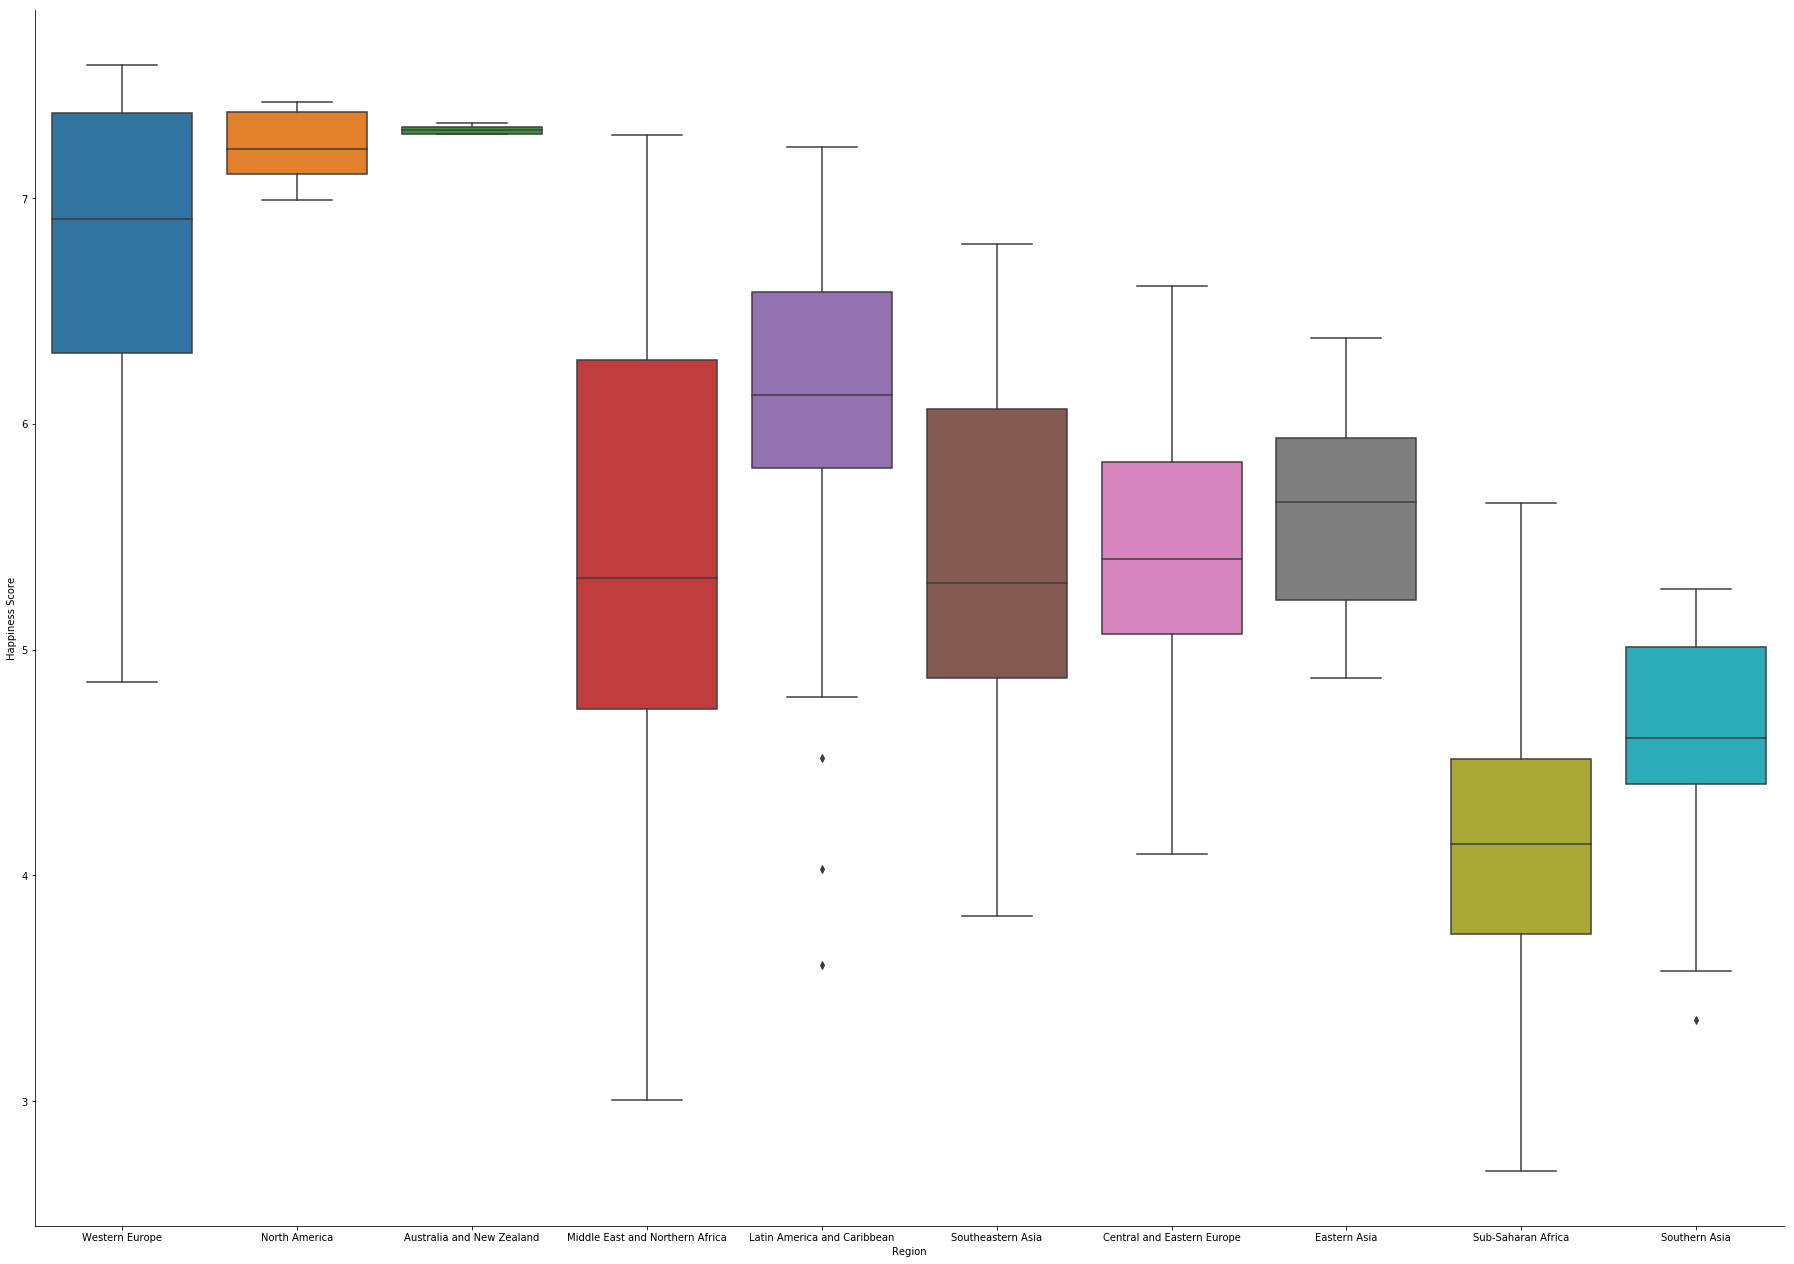

In [23]:
g2 = sns.catplot(x='Region', y="Happiness Score", kind='box', data=happy)
g2.fig.set_size_inches(30,20)

 PairPlot shows relationship between any two variables, it's good to check if there is correlation between them.  From the graph, for example, we can see that 'Health' and 'GDP' are correlated.

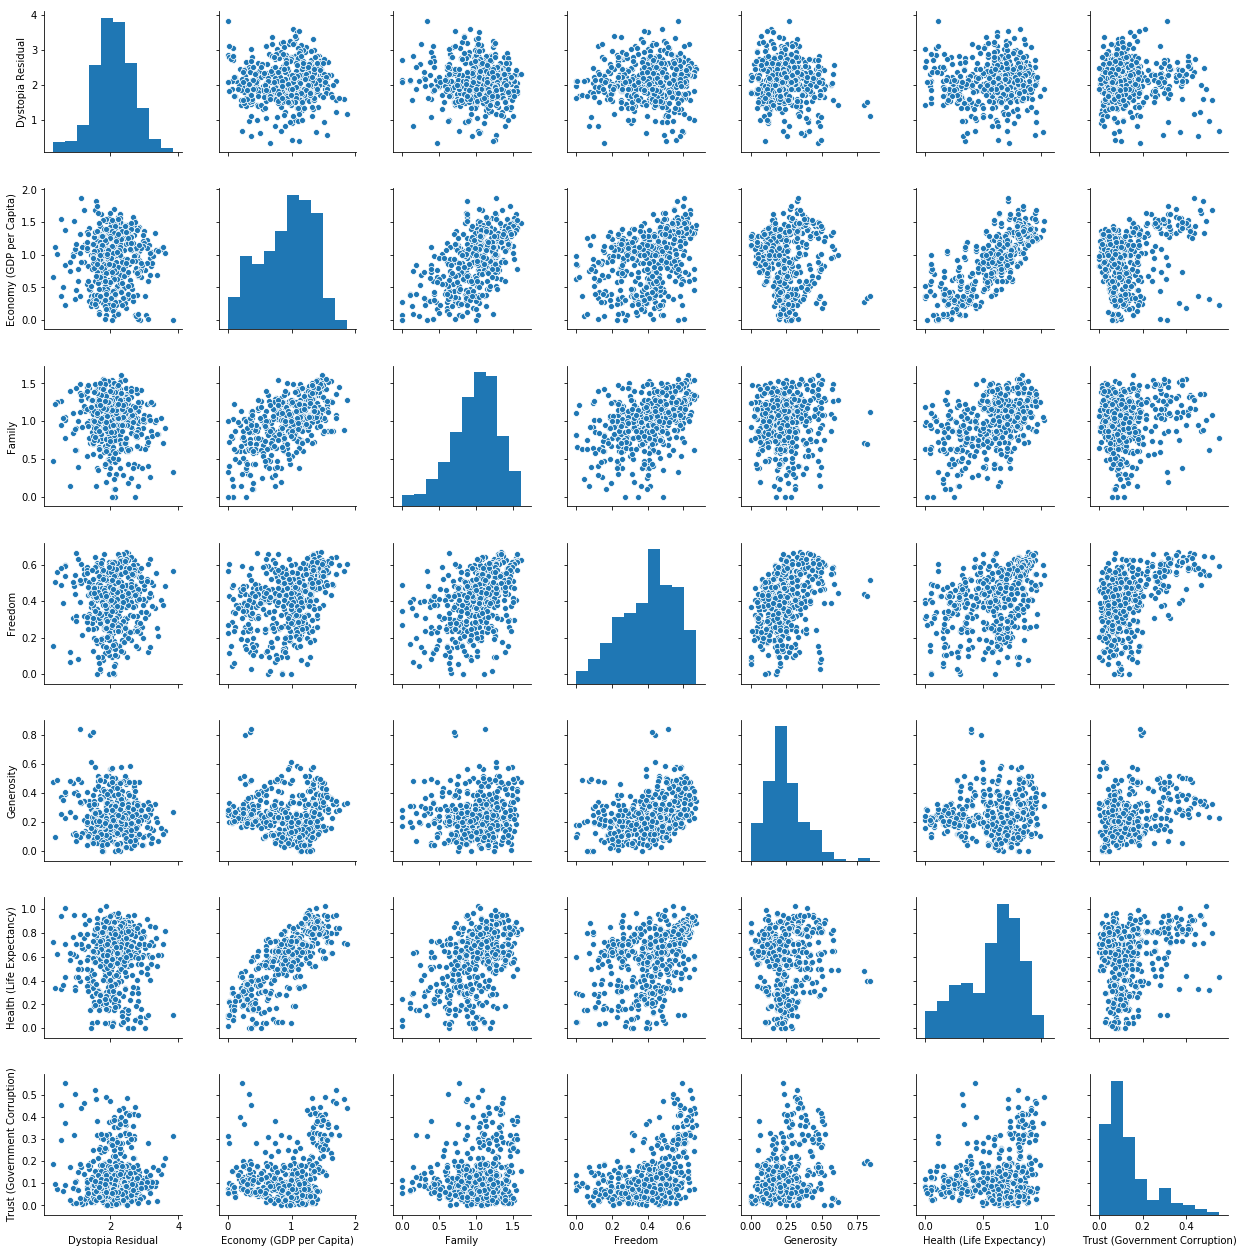

In [24]:
sns.pairplot(happy.drop(columns=['Happiness Score','happy sad']))

we use the binary variable 'happy sad' to see people's happiness from different Region clearer.

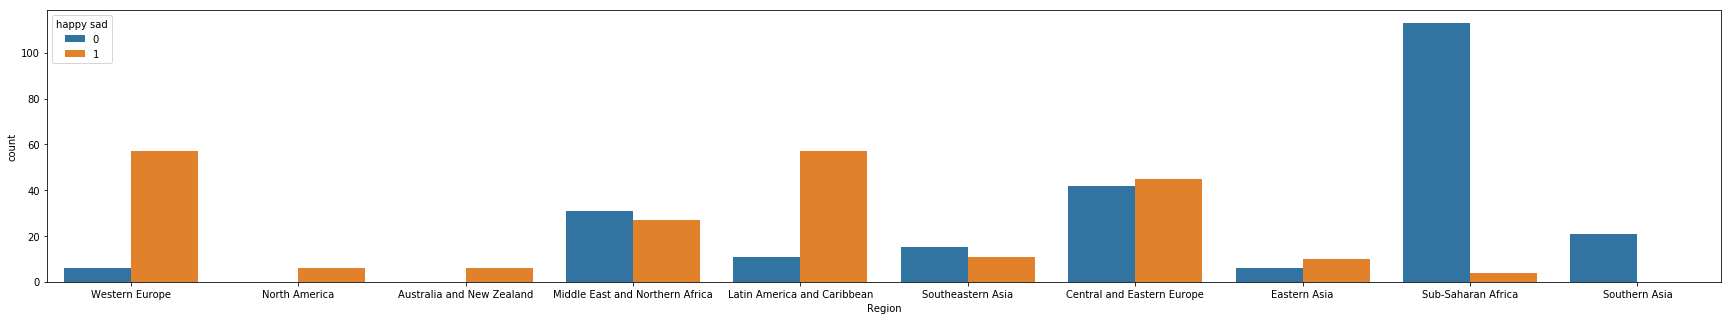

In [25]:
plt.figure(figsize=(30,5))
sns.countplot(x="Region", hue="happy sad", data=happy)

## Outlier Detection

## Modelling

we make Region as a dunmmy variable to create our model.

In [26]:
happy_region = pd.get_dummies(happy['Region'])

In [27]:
happy = pd.concat([happy, happy_region], axis=1)
happy.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Region,Trust (Government Corruption),...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,7.587,0.94143,Western Europe,0.41978,...,0,0,0,0,0,0,0,0,0,1
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,7.561,0.94784,Western Europe,0.14145,...,0,0,0,0,0,0,0,0,0,1
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,7.527,0.87464,Western Europe,0.48357,...,0,0,0,0,0,0,0,0,0,1
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,7.522,0.88521,Western Europe,0.36503,...,0,0,0,0,0,0,0,0,0,1
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,7.427,0.90563,North America,0.32957,...,0,0,0,0,0,1,0,0,0,0


Here are the sum of our data

In [28]:
happy.sum()

Country                            SwitzerlandIcelandDenmarkNorwayCanadaFinlandNe...
Dystopia Residual                                                            983.577
Economy (GDP per Capita)                                                      436.08
Family                                                                       465.463
Freedom                                                                      189.329
Generosity                                                                   113.853
Happiness Score                                                              2524.24
Health (Life Expectancy)                                                     272.585
Trust (Government Corruption)                                                63.3512
happy sad                                                                        225
Australia and New Zealand                                                          6
Central and Eastern Europe                                       

Since 'Australia and New Zealand' and 'North America' have not enough observation so we remove these two column.

we split the dataFrame into X as independent variables and y as dependent variable.

In [29]:
X = happy.drop(columns=['Country','Happiness Score','Region','happy sad', 'Australia and New Zealand', 'North America'])
y = happy['happy sad']

In [30]:
X.sum()

Dystopia Residual                  983.576820
Economy (GDP per Capita)           436.080131
Family                             465.462921
Freedom                            189.329026
Generosity                         113.853308
Health (Life Expectancy)           272.584981
Trust (Government Corruption)       63.351214
Central and Eastern Europe          87.000000
Eastern Asia                        16.000000
Latin America and Caribbean         68.000000
Middle East and Northern Africa     58.000000
Southeastern Asia                   26.000000
Southern Asia                       21.000000
Sub-Saharan Africa                 117.000000
Western Europe                      63.000000
dtype: float64

Now we to the train-test split with 0.2, 0.8 ratio.  

In [31]:
from sklearn.model_selection import train_test_split
random_state= 2
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state= random_state)

we use logistic regression cross validation with 5-folds to train the data and predict the y_values  using test data of X.

Here are the predict data of "happy sad".

In [33]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_pred

/Users/zex0012/Desktop/COMP-4448/python/dst1_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zex0012/Desktop/COMP-4448/python/dst1_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zex0012/Desktop/COMP-4448/python/dst1_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zex0012/Desktop/COMP-4448/python/dst1_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/zex0012/Desktop/COMP-4448/python/dst1_env/lib/pyt

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0])

Here are the mean squared error and mean absolute error.

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred)

0.010638297872340425

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_pred)

0.010638297872340425

From the score of the model, we see that our model have a really high score. Thus we could use this model to 

In [35]:
clf.score(X_val, y_val)

0.9893617021276596

## Show the coefficients of the outcome model 

In [36]:
clf.coef_

array([[56.16610958, 55.10707408, 58.23281533, 54.38768612, 60.69945237,
        51.3206911 , 55.91335035,  1.35923338,  2.48381901, -1.70777759,
        -1.92764565, -0.29770908, -3.11143983,  2.69446627, -0.9454072 ]])

## Confusion Matrix and Heatmap: the model has very good performace

In [37]:
from sklearn.metrics import confusion_matrix
confm = confusion_matrix(y_val, y_pred)

Text(33.0, 0.5, 'True class')

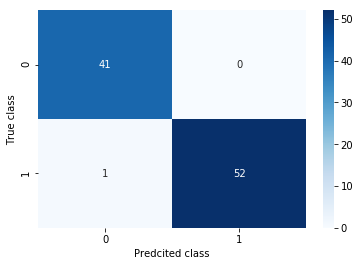

In [38]:
ax= sns.heatmap(confm, annot=True, cmap=plt.cm.Blues)
ax.set_xlabel('Predcited class')
ax.set_ylabel('True class')

## The probability each predict value fall in its tag

In [39]:
prob = clf.predict_proba(X_val)[:, 1]
clf.predict_proba(X_val)[:, 1]
#plt.scatter(prob)

array([1.00000000e+00, 1.62070522e-24, 1.00000000e+00, 4.54556072e-06,
       7.08482790e-04, 3.26997836e-49, 1.00000000e+00, 9.99999519e-01,
       2.35480187e-01, 2.18155024e-19, 7.61437986e-41, 4.79529258e-35,
       1.00000000e+00, 9.96042455e-01, 8.48144529e-04, 1.00000000e+00,
       8.58665356e-31, 1.00718092e-27, 1.00000000e+00, 4.19834659e-29,
       9.99995027e-01, 5.75616599e-16, 1.00000000e+00, 1.02877288e-44,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.64958492e-05,
       1.00000000e+00, 1.92554561e-27, 9.97015312e-01, 1.31776734e-40,
       3.67293289e-48, 1.00000000e+00, 1.00000000e+00, 9.98424204e-01,
       7.99272123e-19, 4.25264334e-05, 9.99672490e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 8.70515933e-27, 9.99960510e-01,
       3.91504197e-12, 1.00000000e+00, 4.40602345e-16, 1.00000000e+00,
       8.92319866e-59, 1.00000000e+00, 1.71818572e-45, 9.99999666e-01,
       1.00000000e+00, 1.00000000e+00, 9.99999978e-01, 8.03544696e-11,
      

# Conclusion (2 points)

## From the coefficients of the final model, we can see that all other variables are not that different in affecting one's 'happiness'. They all have the similar coefficient values around 55 to 60, which means they are all at the similar importance deciding whether people from a country are happy or not. 'Generosity' is slightly more important.

## This analysis also shows that people from 'Sub-Saharan Africa' and 'Southern Asian' are the Regions with the most people unhappy.  Based on our research, maybe they can be more generous to be happy.

## The model we got is 'clf', it is a relatively good model which is tested can precisely predict a country's 'happy or not'. 
